from https://github.com/SeongBeomLEE/Tobigs_Recommendation_System_Seminar/blob/main/Week2_Recommendation_Seminar_Code.ipynb

In [ ]:
!wget https://github.com/dhrim/deep_learning_data/raw/master/movie_ratings_small.csv

--2022-01-24 01:51:06--  https://github.com/dhrim/deep_learning_data/raw/master/movie_ratings_small.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/deep_learning_data/master/movie_ratings_small.csv [following]
--2022-01-24 01:51:07--  https://raw.githubusercontent.com/dhrim/deep_learning_data/master/movie_ratings_small.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2438266 (2.3M) [text/plain]
Saving to: ‘movie_ratings_small.csv’

movie_ratings_small 100%[===================>]   2.33M  --.-KB/s    in 0.02s   

2022-01-24 01:51:07 (102 MB/s) - ‘movie_ratings_small.csv’ saved [243826

In [ ]:
!wget https://github.com/dhrim/deep_learning_data/raw/master/movies_metadata.csv

--2022-01-24 01:51:07--  https://github.com/dhrim/deep_learning_data/raw/master/movies_metadata.csv
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/deep_learning_data/master/movies_metadata.csv [following]
--2022-01-24 01:51:07--  https://raw.githubusercontent.com/dhrim/deep_learning_data/master/movies_metadata.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34445126 (33M) [text/plain]
Saving to: ‘movies_metadata.csv’

movies_metadata.csv 100%[===================>]  32.85M  --.-KB/s    in 0.09s   

2022-01-24 01:51:08 (362 MB/s) - ‘movies_metadata.csv’ saved [34445126/34445126]



# Rule-based Model


## A Priori 알고리즘

from https://www.kaggle.com/ankits29/movie-recommendation-with-ml-apriori-explained

각 유저가 본 영화들의 리스트를 기반으로 특정 영화에 대한 다른 영화의 확률적 수치로 구한다.

예) 귀저기 -> 맥주

입력 : 영화 이름

출력 : 추천하는 영화

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

In [ ]:
rating = pd.read_csv("movie_ratings_small.csv")
rating.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
print(len(rating))

100004


In [ ]:
meta = pd.read_csv('movies_metadata.csv')
meta.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
# meta.id가 이상한 row들이 있다. 삭제하자. imdb=='0'으로 찾아낼 수 있다.
print(len(meta))
display(meta[meta.imdb_id=='0'])
meta = meta[meta.imdb_id!='0']
print(len(meta))

45466


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Midnight Man,False,6.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Mardock Scramble: The Third Exhaust,False,7.0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Beware Of Frost Bites,Avalanche Sharks,False,4.3,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


45463


2개의 dataframe을 합치기

In [ ]:
meta = meta.rename(columns={'id':'movieId'})
meta['movieId'] = meta['movieId'].astype(int)

merged = pd.merge(rating, meta[['movieId', 'original_title']], how='left', on='movieId')
merged

,userId,movieId,rating,timestamp,original_title
0,1,31,2.5,1260759144,NaN
1,1,1029,3.0,1260759179,NaN
2,1,1061,3.0,1260759182,NaN
3,1,1129,2.0,1260759185,NaN
4,1,1172,4.0,1260759205,NaN
...,...,...,...,...,...
100004,671,6268,2.5,1065579370,NaN
100005,671,6269,4.0,1065149201,NaN
100006,671,6365,4.0,1070940363,NaN
100007,671,6385,2.5,1070979663,NaN


original_title이 비어있는 row 삭제

In [ ]:
print(len(merged))
merged = merged[merged['original_title'].notnull()].reset_index(drop=True)
print(len(merged))
merged.head()

100009
44994


,userId,movieId,rating,timestamp,original_title
0,1,1371,2.5,1260759135,Rocky III
1,1,1405,1.0,1260759203,Greed
2,1,2105,4.0,1260759139,American Pie
3,1,2193,2.0,1260759198,My Tutor
4,1,2294,2.0,1260759108,Jay and Silent Bob Strike Back


In [ ]:
user_n_movie = merged.pivot_table(index="userId", columns='original_title')['rating']
user_n_movie

original_title,!Women Art Revolution,'Gator Bait,'Twas the Night Before Christmas,...Più forte ragazzi!,00 Schneider - Jagd auf Nihil Baxter,10 Items or Less,10 Things I Hate About You,"10,000 BC",11'09''01 - September 11,12 + 1,12 Angry Men,13 Tzameti,1408,15 Minutes,16 Blocks,1724 기방난동사건,1942: A Love Story,1984,2 Days in Paris,"20,000 Leagues Under the Sea",2001: A Space Odyssey,2010,2046,2061 - Un anno eccezionale,21 Grams,24 Hour Party People,25th Hour,28 Days Later,28 Weeks Later,29th Street,2:37,3 Ninjas: High Noon at Mega Mountain,3 hommes et un couffin,300,33 sceny z życia,36 Fillette,"4 luni, 3 săptămîni și 2 zile",40 Days and 40 Nights,42nd Street,48 Hrs.,...,真夜中の弥次さん喜多さん,続宮本武蔵 一乗寺の決闘,綠草地,纵横四海,羅生門,英雄,菊次郎の夏,薔薇の葬列,蜘蛛巣城,裸の島,誰も知らない,豚と軍艦,赤ひげ,野火,鎗王之王,隠し砦の三悪人,風の谷のナウシカ,香港製造,鬼婆,鷹爪鐵布衫,거룩한 계보,고지전,공동경비구역 JSA,괴물,김복남 살인사건의 전말,다세포 소녀,도쿄!,밀양,봄 여름 가을 겨울 그리고 봄,빈집,사마리아,야수,연가시,오직 그대만,올드보이,"장화, 홍련",최종병기 활,친절한 금자씨,해안선,활
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


rating 여부를 1, 0으로 표시

In [ ]:
def has_rating(v):
    return int(v>0)
user_n_movie = user_n_movie.applymap(has_rating)
user_n_movie

original_title,!Women Art Revolution,'Gator Bait,'Twas the Night Before Christmas,...Più forte ragazzi!,00 Schneider - Jagd auf Nihil Baxter,10 Items or Less,10 Things I Hate About You,"10,000 BC",11'09''01 - September 11,12 + 1,12 Angry Men,13 Tzameti,1408,15 Minutes,16 Blocks,1724 기방난동사건,1942: A Love Story,1984,2 Days in Paris,"20,000 Leagues Under the Sea",2001: A Space Odyssey,2010,2046,2061 - Un anno eccezionale,21 Grams,24 Hour Party People,25th Hour,28 Days Later,28 Weeks Later,29th Street,2:37,3 Ninjas: High Noon at Mega Mountain,3 hommes et un couffin,300,33 sceny z życia,36 Fillette,"4 luni, 3 săptămîni și 2 zile",40 Days and 40 Nights,42nd Street,48 Hrs.,...,真夜中の弥次さん喜多さん,続宮本武蔵 一乗寺の決闘,綠草地,纵横四海,羅生門,英雄,菊次郎の夏,薔薇の葬列,蜘蛛巣城,裸の島,誰も知らない,豚と軍艦,赤ひげ,野火,鎗王之王,隠し砦の三悪人,風の谷のナウシカ,香港製造,鬼婆,鷹爪鐵布衫,거룩한 계보,고지전,공동경비구역 JSA,괴물,김복남 살인사건의 전말,다세포 소녀,도쿄!,밀양,봄 여름 가을 겨울 그리고 봄,빈집,사마리아,야수,연가시,오직 그대만,올드보이,"장화, 홍련",최종병기 활,친절한 금자씨,해안선,활
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
668,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
669,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


apriori를 사용하여 빈도 구하기

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(user_n_movie, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.244411,(...Più forte ragazzi!)
1,0.131148,"(20,000 Leagues Under the Sea)"
2,0.129657,(2001: A Space Odyssey)
3,0.298063,(48 Hrs.)
4,0.298063,(5 Card Stud)
...,...,...
7320,0.101341,"(Sissi, The Conversation, The Million Dollar H..."
7321,0.102832,"(Sissi, The Hours, The Million Dollar Hotel, T..."
7322,0.104322,"(Sissi, The Million Dollar Hotel, Titanic, Ter..."
7323,0.101341,"(Sissi, The Conversation, The Million Dollar H..."


빈도를 가지고 A영화를 본사람이 B영화를 본 확률적 수치 lift 구하기

In [ ]:
rules = association_rules(frequent_itemsets , metric="confidence", min_threshold=0.0)
rules[['antecedents', 'consequents', 'lift']]

,antecedents,consequents,lift
0,(48 Hrs.),(...Più forte ragazzi!),1.432012
1,(...Più forte ragazzi!),(48 Hrs.),1.432012
2,(5 Card Stud),(...Più forte ragazzi!),1.922988
3,(...Più forte ragazzi!),(5 Card Stud),1.922988
4,(...Più forte ragazzi!),(A Nightmare on Elm Street),1.932080
...,...,...,...
75503,(Sissi),"(The Hours, The Million Dollar Hotel, Rain Man...",2.791347
75504,(The Million Dollar Hotel),"(Sissi, The Hours, Rain Man, Terminator 3: Ris...",1.819626
75505,(Rain Man),"(Sissi, The Hours, The Million Dollar Hotel, T...",2.928669
75506,(Terminator 3: Rise of the Machines),"(Sissi, The Hours, The Million Dollar Hotel, R...",1.882716


lift를 가지고 큰 순서로 소팅

In [ ]:
sorted_rules = rules.sort_values(by=['lift'], ascending=False)
sorted_rules[['antecedents', 'consequents', 'lift']]

,antecedents,consequents,lift
1591,(Ober),(Muxmäuschenstill),5.601529
1590,(Muxmäuschenstill),(Ober),5.601529
37844,"(Big Fish, Titanic)","(Солярис, Psycho)",5.150629
37845,"(Солярис, Psycho)","(Big Fish, Titanic)",5.150629
37817,"(Psycho, Rain Man)","(Big Fish, Titanic)",5.133663
...,...,...,...
181,(5 Card Stud),(Men in Black II),1.108348
572,(Bang Boom Bang - Ein todsicheres Ding),(The 39 Steps),1.106804
573,(The 39 Steps),(Bang Boom Bang - Ein todsicheres Ding),1.106804
1304,(Sissi),(License to Wed),1.076070


특정 영화이름에 대한 것만 추리기

In [ ]:
target_movie = 'Men in Black II'

is_target_movie = sorted_rules['antecedents'].apply(lambda x: len(x)==1 and list(x)[0]==target_movie)
filtered = sorted_rules[is_target_movie]
filtered[['antecedents', 'consequents', 'lift']]

,antecedents,consequents,lift
14015,(Men in Black II),"(Scarface, Terminator 3: Rise of the Machines)",2.344332
43408,(Men in Black II),"(Sleepless in Seattle, The Talented Mr. Ripley...",2.341338
14160,(Men in Black II),"(The Talented Mr. Ripley, The 39 Steps)",2.288724
38955,(Men in Black II),"(Солярис, Terminator 3: Rise of the Machines, ...",2.288724
43379,(Men in Black II),"(Sleepless in Seattle, Terminator 3: Rise of t...",2.269345
...,...,...,...
1462,(Men in Black II),(To Kill a Mockingbird),1.225446
1413,(Men in Black II),(Monsoon Wedding),1.224453
620,(Men in Black II),(Batman Returns),1.213192
1437,(Men in Black II),(Silent Hill),1.128551


lift 순으로 영화제목을 리스트에 담기

In [ ]:
recommentations = []
for movies in filtered['consequents'].values:
    for title in movies:
        if title in recommentations: continue
        recommentations.append(title)

추천 결과

In [ ]:
recommentations[:10]

['Scarface',
 'Terminator 3: Rise of the Machines',
 'Sleepless in Seattle',
 'The Talented Mr. Ripley',
 'The 39 Steps',
 'Солярис',
 'Dawn of the Dead',
 'The Thomas Crown Affair',
 'Jarhead',
 'Sissi']

# Content-based Model

## 데이터 간 거리 사용

각 영화에 대한 장르로 구성된 벡터를 기반으로, 각 거리로 비슷한 영화를 찾는다.

입력 : 영화 이름

출력 : 장르가 비슷한 영화


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

In [ ]:
meta = pd.read_csv('movies_metadata.csv')
meta.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
meta = meta[:10000]

In [ ]:
def get_genres(x):
  result = []
  # x = "[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]""
  x = eval(x)
  for i in x:
    result.append(i['name'])
  # result = '[Romance, Comedy]'
  return result

meta['clean_genres'] = meta['genres'].apply(get_genres)
meta[['id', 'original_title', 'genres', 'clean_genres']]

,id,original_title,genres,clean_genres
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[Animation, Comedy, Family]"
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[Adventure, Fantasy, Family]"
2,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[Romance, Comedy]"
3,31357,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[Comedy, Drama, Romance]"
4,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",[Comedy]
...,...,...,...,...
9995,43379,Miracolo a Milano,"[{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...","[Drama, Fantasy, Comedy]"
9996,9393,Napola – Elite für den Führer,"[{'id': 18, 'name': 'Drama'}]",[Drama]
9997,16972,The Frisco Kid,"[{'id': 37, 'name': 'Western'}, {'id': 35, 'na...","[Western, Comedy]"
9998,21325,Onmyoji,"[{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...","[Drama, Fantasy, Horror]"


In [ ]:
id2title = {}
title2id = {}
index2title = {}
title2index = {}

for index, row in meta.iterrows():
    id2title[row['id']] = row['original_title']
    title2id[row['original_title']] = row['id']
    index2title[index] = row['original_title']
    title2index[row['original_title']] = index

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

clearn_genres_values = meta['clean_genres'].values
transaction_encoder = TransactionEncoder()
movie_and_genre = transaction_encoder.fit(clearn_genres_values).transform(clearn_genres_values)
print(movie_and_genre.shape)
movie_and_genre

(10000, 20)


array([[False, False,  True, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False],
       [ True,  True, False, ..., False, False, False]])

In [ ]:
movie_and_genre = pd.DataFrame(movie_and_genre, columns=transaction_encoder.columns_)
movie_and_genre = movie_and_genre.astype(np.int16)
movie_and_genre.index = meta.id
movie_and_genre.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,,
862,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8844,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
15602,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
31357,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
11862,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
def get_similar_movies(distance_matrix, target_movie, topn=10, reverse=False):
    movie_index = title2index[target_movie]
    print(movie_index)
    similar_scores = [(i, s) for i, s in enumerate(distance_matrix[movie_index])]
    sorted_similar_scores = sorted(similar_scores, key = lambda x: x[1], reverse=reverse)
    similar_movies = [(index2title[i], s) for i, s in sorted_similar_scores]
    similar_movies = similar_movies[1:topn+1] # 자기 자신은 뺀다.

    return similar_movies

### 내적

In [ ]:
dot_scores = np.dot(movie_and_genre.values, movie_and_genre.values.T)

In [ ]:
print(dot_scores.shape)
print(dot_scores[:5,:5])

(10000, 10000)
[[3 1 1 1 1]
 [1 3 0 0 0]
 [1 0 2 2 1]
 [1 0 2 3 1]
 [1 0 1 1 1]]


In [ ]:
get_similar_movies(dot_scores, 'Men in Black II', reverse=True)

5325


[('Small Soldiers', 4),
 ('Superman III', 4),
 ('Wild Wild West', 4),
 ('Mystery Men', 4),
 ('Teenage Mutant Ninja Turtles', 4),
 ('Teenage Mutant Ninja Turtles II: The Secret of the Ooze', 4),
 ('Teenage Mutant Ninja Turtles III', 4),
 ('Sheena', 4),
 ('Jimmy Neutron: Boy Genius', 4),
 ('Men in Black II', 4)]

### 피어슨 유사도

In [ ]:
pearson_scores = movie_and_genre.T.corr().values

In [ ]:
print(pearson_scores.shape)
print(pearson_scores[:5,:5])

(10000, 10000)
[[ 1.          0.21568627  0.32673202  0.21568627  0.54611868]
 [ 0.21568627  1.         -0.14002801 -0.17647059 -0.09637388]
 [ 0.32673202 -0.14002801  1.          0.79349205  0.6882472 ]
 [ 0.21568627 -0.17647059  0.79349205  1.          0.54611868]
 [ 0.54611868 -0.09637388  0.6882472   0.54611868  1.        ]]


In [ ]:
get_similar_movies(pearson_scores, 'Men in Black II', reverse=True)

5325


[('X-Men', 0.8401680504168058),
 ('The Time Machine', 0.8401680504168058),
 ('Death Race 2000', 0.8401680504168058),
 ('The Stepford Wives', 0.8401680504168058),
 ('AVP: Alien vs. Predator', 0.8401680504168058),
 ('The Hitch Hikers Guide to the Galaxy', 0.8401680504168058),
 ('Cyborg 2', 0.8401680504168058),
 ('Firewalker', 0.840168050416805),
 ('O Brother, Where Art Thou?', 0.840168050416805),
 ('Blankman', 0.840168050416805)]

### 코사인 유사도

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_scores = cosine_similarity(movie_and_genre, movie_and_genre)

In [ ]:
print(cosine_scores.shape)
print(cosine_scores[:5,:5])

(10000, 10000)
[[1.         0.33333333 0.40824829 0.33333333 0.57735027]
 [0.33333333 1.         0.         0.         0.        ]
 [0.40824829 0.         1.         0.81649658 0.70710678]
 [0.33333333 0.         0.81649658 1.         0.57735027]
 [0.57735027 0.         0.70710678 0.57735027 1.        ]]


In [ ]:
get_similar_movies(cosine_scores, 'Men in Black II', reverse=True)

5325


[('Men in Black II', 1.0),
 ('Double Dragon', 1.0),
 ('Small Soldiers', 0.8944271909999159),
 ('Superman III', 0.8944271909999159),
 ('Wild Wild West', 0.8944271909999159),
 ('Mystery Men', 0.8944271909999159),
 ('Teenage Mutant Ninja Turtles', 0.8944271909999159),
 ('Teenage Mutant Ninja Turtles II: The Secret of the Ooze',
  0.8944271909999159),
 ('Sheena', 0.8944271909999159),
 ('Spy Kids 3-D: Game Over', 0.8944271909999159)]

### 유클리드 거리

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
euclidean_scores = euclidean_distances(movie_and_genre, movie_and_genre)

In [ ]:
print(movie_and_genre.shape)
print(euclidean_scores.shape)

(10000, 20)
(10000, 10000)


In [ ]:
print(euclidean_scores[:5,:5])

[[0.         2.         1.73205081 2.         1.41421356]
 [2.         0.         2.23606798 2.44948974 2.        ]
 [1.73205081 2.23606798 0.         1.         1.        ]
 [2.         2.44948974 1.         0.         1.41421356]
 [1.41421356 2.         1.         1.41421356 0.        ]]


In [ ]:
get_similar_movies(euclidean_scores, 'Men in Black II', reverse=False)

5325


[('Men in Black II', 0.0),
 ('Double Dragon', 0.0),
 ('Star Wars', 1.0),
 ('Stargate', 1.0),
 ('The Three Musketeers', 1.0),
 ('Independence Day', 1.0),
 ('The Empire Strikes Back', 1.0),
 ('Return of the Jedi', 1.0),
 ('Forbidden Planet', 1.0),
 ('The Lost World: Jurassic Park', 1.0)]

### 자카르도 거리

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances
pairwise_scores = pairwise_distances(movie_and_genre.values, metric='jaccard')

In [ ]:
print(pairwise_scores.shape)
print(pairwise_scores[:5,:5])

(10000, 10000)
[[0.         0.8        0.75       0.8        0.66666667]
 [0.8        0.         1.         1.         1.        ]
 [0.75       1.         0.         0.33333333 0.5       ]
 [0.8        1.         0.33333333 0.         0.66666667]
 [0.66666667 1.         0.5        0.66666667 0.        ]]


In [ ]:
get_similar_movies(pairwise_scores, 'Men in Black II', reverse=False)

5325


[('Men in Black II', 0.0),
 ('Double Dragon', 0.0),
 ('Small Soldiers', 0.2),
 ('Superman III', 0.2),
 ('Wild Wild West', 0.2),
 ('Mystery Men', 0.2),
 ('Teenage Mutant Ninja Turtles', 0.2),
 ('Teenage Mutant Ninja Turtles II: The Secret of the Ooze', 0.2),
 ('Sheena', 0.2),
 ('Spy Kids 3-D: Game Over', 0.2)]

## TF-IDF 사용

영화의 개요에 대한 TF-IDF 벡터를 구하고, 이를 기반으로 거리를 구한다.

입력 : 영화 이름

출력 : 개요가 비슷한 영황


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

In [ ]:
meta = pd.read_csv('movies_metadata.csv')
print(len(meta))
meta = meta[meta['overview'].notnull()].reset_index(drop=True)
print(len(meta))

meta.head()

45466
44512


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
id2title = {}
title2id = {}
index2title = {}
title2index = {}

for index, row in meta.iterrows():
    id2title[row['id']] = row['original_title']
    title2id[row['original_title']] = row['id']
    index2title[index] = row['original_title']
    title2index[row['original_title']] = index

In [ ]:
meta[['original_title', 'overview']]

,original_title,overview
0,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,Jumanji,When siblings Judy and Peter discover an encha...
2,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,Father of the Bride Part II,Just when George Banks has recovered from his ...
...,...,...
44507,رگ خواب,Rising and falling between a man and woman.
44508,Siglo ng Pagluluwal,An artist struggles to finish his work while a...
44509,Betrayal,"When one of her hits goes wrong, a professiona..."
44510,Satana likuyushchiy,"In a small town live two brothers, one a minis..."



```
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']

shape = (4, 9)

tfidf_matrix[0] # 첫번째 문서에 대한 각 단어의 tf-idf 점수
  (document_idx, term_idx) tf-idf score
  (0, 1)	0.46979138557992045  # document
  (0, 2)	0.5802858236844359   # first
  (0, 3)	0.38408524091481483  # is
  (0, 6)	0.38408524091481483  # the
  (0, 8)	0.38408524091481483  # this
```

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())

print(X.shape)
print(X[0])


['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
(4, 9)
  (0, 1)	0.46979138557992045
  (0, 2)	0.5802858236844359
  (0, 6)	0.38408524091481483
  (0, 3)	0.38408524091481483
  (0, 8)	0.38408524091481483


In [ ]:
meta['overview']

0        Led by Woody, Andy's toys live happily in his ...
1        When siblings Judy and Peter discover an encha...
2        A family wedding reignites the ancient feud be...
3        Cheated on, mistreated and stepped on, the wom...
4        Just when George Banks has recovered from his ...
                               ...                        
44507          Rising and falling between a man and woman.
44508    An artist struggles to finish his work while a...
44509    When one of her hits goes wrong, a professiona...
44510    In a small town live two brothers, one a minis...
44511    50 years after decriminalisation of homosexual...
Name: overview, Length: 44512, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(meta['overview'])
tfidf_matrix.shape

(44512, 75827)

In [ ]:
print(tfidf_vectorizer.get_feature_names_out())

['00' '000' '000km' ... '첫사랑' 'ﬁrst' 'ﬁve']


### 코사인 유사도

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_scores = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
get_similar_movies(cosine_scores, 'Men in Black II', reverse=True)

5304


[('Men in Black', 0.2977976125916566),
 ('Born to Win', 0.17566585381659663),
 ('Four Mothers', 0.13121948657965987),
 ('Poison Ivy: The New Seduction', 0.1279314463610108),
 ('10 Years', 0.12612520359043708),
 ('The Opposite Sex', 0.12293798259669197),
 ('Abraxas, Guardian of the Universe', 0.12226280408671779),
 ("Please Don't Eat the Daisies", 0.1218855444580611),
 ('Kissing a Fool', 0.11904598447468569),
 ('Flesh and Bone', 0.11277019200576295)]

### 유클리드 거리

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
euclidean_scores = euclidean_distances(tfidf_matrix, tfidf_matrix)

In [ ]:
get_similar_movies(euclidean_scores, 'Men in Black II', revers=False)

5304


[('Snow days', 1.0),
 ('Slaves of New York', 1.0),
 ('Hamlet', 1.0),
 ('Game Over', 1.0),
 ('Sur', 1.0),
 ('Αυστηρώς Κατάλληλο', 1.0),
 ('Iceland', 1.0),
 ('Wojaczek', 1.0),
 ('Men in Black', 1.185075851925389),
 ('Born to Win', 1.2840047867382764)]

## Word2Vec

사용자가 영화를 본 순서에 맞춰서 영화를 추천

input = 사용자가 영화를 본 순서 데이터

output = 현재 사용자가 보는 영화를 기준으로 비슷한 순서의 영화를 추천

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

In [ ]:
rating = pd.read_csv("movie_ratings_small.csv")
rating.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
meta = pd.read_csv('movies_metadata.csv')
meta.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
# meta.id가 이상한 row들이 있다. 삭제하자. imdb=='0'으로 찾아낼 수 있다.
print(len(meta))
display(meta[meta.imdb_id=='0'])
meta = meta[meta.imdb_id!='0']
print(len(meta))

45466


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Midnight Man,False,6.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Mardock Scramble: The Third Exhaust,False,7.0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Beware Of Frost Bites,Avalanche Sharks,False,4.3,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


45463


2개의 dataframe을 합치기

In [ ]:
meta = meta.rename(columns={'id':'movieId'})
meta['movieId'] = meta['movieId'].astype(int)

merged = pd.merge(rating, meta[['movieId', 'original_title']], how='left', on='movieId')
merged

,userId,movieId,rating,timestamp,original_title
0,1,31,2.5,1260759144,NaN
1,1,1029,3.0,1260759179,NaN
2,1,1061,3.0,1260759182,NaN
3,1,1129,2.0,1260759185,NaN
4,1,1172,4.0,1260759205,NaN
...,...,...,...,...,...
100004,671,6268,2.5,1065579370,NaN
100005,671,6269,4.0,1065149201,NaN
100006,671,6365,4.0,1070940363,NaN
100007,671,6385,2.5,1070979663,NaN


original_title이 비어있는 row 삭제

In [ ]:
print(len(merged))
merged = merged[merged['original_title'].notnull()].reset_index(drop=True)
print(len(merged))
merged.head()

100009
44994


,userId,movieId,rating,timestamp,original_title
0,1,1371,2.5,1260759135,Rocky III
1,1,1405,1.0,1260759203,Greed
2,1,2105,4.0,1260759139,American Pie
3,1,2193,2.0,1260759198,My Tutor
4,1,2294,2.0,1260759108,Jay and Silent Bob Strike Back


In [ ]:
print(len(merged.userId.unique()))

671


In [ ]:
user_viewed_movie_names = merged.groupby(['userId'])['original_title'].agg({'unique'}).values
print(user_viewed_movie_names.shape)
print(user_viewed_movie_names[0][0])
print(user_viewed_movie_names[1][0])

(671, 1)
['Rocky III' 'Greed' 'American Pie' 'My Tutor'
 'Jay and Silent Bob Strike Back' 'Vivement dimanche!']
['The Dark' '2001: A Space Odyssey' 'Trois couleurs : Rouge'
 'Der Himmel über Berlin' '48 Hrs.' 'Lost in Translation' "Ocean's Eleven"
 'Back to the Future Part II' 'Star Trek IV: The Voyage Home'
 'A Clockwork Orange' 'Lucky Number Slevin'
 'Berlin: Die Sinfonie der Grosstadt' 'Rebecca' 'Czlowiek z zelaza'
 'Stand by Me' 'Pocketful of Miracles' 'Live and Let Die'
 'Cat on a Hot Tin Roof' 'Lili Marleen' 'Le Mépris' 'Batman Begins'
 'Das weisse Rauschen' "Dave Chappelle's Block Party"
 'Terminator 3: Rise of the Machines' 'La science des rêves' 'Catwoman'
 'Grbavica' 'True Romance' 'Night on Earth' 'Crustacés et coquillages'
 'The Devil Wears Prada' 'Batman Returns' 'A Nightmare on Elm Street'
 'La strada' 'Sommer vorm Balkon' 'Romeo + Juliet' 'Sissi'
 'My Own Private Idaho' 'Monsoon Wedding' 'The Green Mile'
 'Reservoir Dogs' 'Love Actually' 'Notting Hill' 'Once Were Warrior

In [ ]:
sentence = []
for movie_names_by_a_user in user_viewed_movie_names:
    sentence.append(list(map(str, movie_names_by_a_user[0])))

In [ ]:
print(sentence[0])

['Rocky III', 'Greed', 'American Pie', 'My Tutor', 'Jay and Silent Bob Strike Back', 'Vivement dimanche!']


In [ ]:
from gensim.models import Word2Vec
word2vec_model = Word2Vec(sentence, min_count=1, iter=200)

In [ ]:
print(len(merged['original_title'].unique()))
print(len(word2vec_model.wv.vocab))
print(list(word2vec_model.wv.vocab)[:5])

2798
2798
['Rocky III', 'Greed', 'American Pie', 'My Tutor', 'Jay and Silent Bob Strike Back']


In [ ]:
word2vec_model.wv.most_similar(positive=['Men in Black II'], topn=10)

[('Grease', 0.5116428136825562),
 ('Interview with the Vampire', 0.4992068111896515),
 ('Smultronstället', 0.4846014678478241),
 ('Wild Things', 0.48200929164886475),
 ('The Man with the Golden Arm', 0.4553529620170593),
 ('La belle et la bête', 0.4336131513118744),
 ('Wag the Dog', 0.42984092235565186),
 ('Out of the Past', 0.4246070981025696),
 ("Harry Potter and the Philosopher's Stone", 0.42392653226852417),
 ("La passion de Jeanne d'Arc", 0.41899374127388)]

# Collaborative Filtering-based Model

## Neighborhood Model

### 유저 기반

대상 사용자와 가장 가까운 사용자를 구해서 그 사람의 영화를 추천한다.

입력 : 특정 사용자

출력 : 영화

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

In [ ]:
rating = pd.read_csv("movie_ratings_small.csv")
rating.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
meta = pd.read_csv('movies_metadata.csv')
meta.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
# meta.id가 이상한 row들이 있다. 삭제하자. imdb=='0'으로 찾아낼 수 있다.
print(len(meta))
display(meta[meta.imdb_id=='0'])
meta = meta[meta.imdb_id!='0']
print(len(meta))

45466


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Midnight Man,False,6.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Mardock Scramble: The Third Exhaust,False,7.0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Beware Of Frost Bites,Avalanche Sharks,False,4.3,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


45463


2개의 dataframe을 합치기

In [ ]:
meta = meta.rename(columns={'id':'movieId'})
meta['movieId'] = meta['movieId'].astype(int)

merged = pd.merge(rating, meta[['movieId', 'original_title']], how='left', on='movieId')
merged

,userId,movieId,rating,timestamp,original_title
0,1,31,2.5,1260759144,NaN
1,1,1029,3.0,1260759179,NaN
2,1,1061,3.0,1260759182,NaN
3,1,1129,2.0,1260759185,NaN
4,1,1172,4.0,1260759205,NaN
...,...,...,...,...,...
100004,671,6268,2.5,1065579370,NaN
100005,671,6269,4.0,1065149201,NaN
100006,671,6365,4.0,1070940363,NaN
100007,671,6385,2.5,1070979663,NaN


original_title이 비어있는 row 삭제

In [ ]:
print(len(merged))
merged = merged[merged['original_title'].notnull()].reset_index(drop=True)
print(len(merged))
merged.head()

100009
44994


,userId,movieId,rating,timestamp,original_title
0,1,1371,2.5,1260759135,Rocky III
1,1,1405,1.0,1260759203,Greed
2,1,2105,4.0,1260759139,American Pie
3,1,2193,2.0,1260759198,My Tutor
4,1,2294,2.0,1260759108,Jay and Silent Bob Strike Back


In [ ]:
id2title = {}
title2id = {}

for index, row in merged.iterrows():
    id2title[row['movieId']] = row['original_title']
    title2id[row['original_title']] = row['movieId']

In [ ]:
user_movie_matrix = merged.pivot_table(index='userId', columns = 'movieId', values = 'rating')

In [ ]:
user_movie_matrix

movieId,2,3,5,6,11,12,13,14,15,16,17,18,19,20,21,22,24,25,26,27,28,30,35,38,55,58,59,62,63,64,65,66,68,69,70,71,73,74,76,77,...,111759,111913,112460,112582,112655,112735,112767,114044,114060,114464,115210,115877,116977,118900,120637,121113,121491,122924,126420,127098,127728,128606,128846,129009,130450,130452,130980,131830,132961,133365,134158,134368,134569,134881,135536,140174,142507,148652,158238,160718
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,NaN,NaN,NaN,4.0,3.0,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,3.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
user_movie_matrix.fillna(0, inplace=True)

In [ ]:
user_movie_matrix

movieId,2,3,5,6,11,12,13,14,15,16,17,18,19,20,21,22,24,25,26,27,28,30,35,38,55,58,59,62,63,64,65,66,68,69,70,71,73,74,76,77,...,111759,111913,112460,112582,112655,112735,112767,114044,114060,114464,115210,115877,116977,118900,120637,121113,121491,122924,126420,127098,127728,128606,128846,129009,130450,130452,130980,131830,132961,133365,134158,134368,134569,134881,135536,140174,142507,148652,158238,160718
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(user_movie_matrix, user_movie_matrix)

similarity_df = pd.DataFrame(similarity)
print(similarity_df.head())

similarity_df.index = user_movie_matrix.index
similarity_df.columns = user_movie_matrix.index

print(similarity_df.head())

        0         1         2    ...       668       669       670
0  1.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
1  0.000000  1.000000  0.172900  ...  0.044339  0.173073  0.109078
2  0.000000  0.172900  1.000000  ...  0.106074  0.224741  0.206307
3  0.111740  0.118982  0.065062  ...  0.121362  0.009076  0.146577
4  0.045325  0.105927  0.138674  ...  0.000000  0.073629  0.206709

[5 rows x 671 columns]
userId       1         2         3    ...       669       670       671
userId                                ...                              
1       1.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
2       0.000000  1.000000  0.172900  ...  0.044339  0.173073  0.109078
3       0.000000  0.172900  1.000000  ...  0.106074  0.224741  0.206307
4       0.111740  0.118982  0.065062  ...  0.121362  0.009076  0.146577
5       0.045325  0.105927  0.138674  ...  0.000000  0.073629  0.206709

[5 rows x 671 columns]


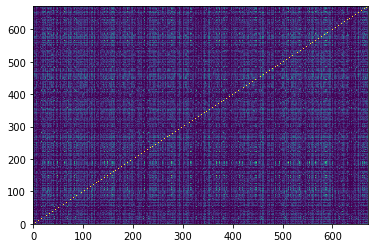

In [ ]:
plt.pcolor(similarity_df)
plt.show()

In [ ]:
user_id = 1
user_viewed_movies = merged[merged['userId'] == user_id]['original_title'].tolist()
print(f'=== user({user_id}) Movie List')
print(*user_viewed_movies, sep='\n')


similar_user_indexes = similarity_df.loc[user_id, :].sort_values(ascending=False).index.tolist()
most_similar_user_index = similar_user_indexes[1]
most_similar_user_viewed_movies = merged[merged['userId']==most_similar_user_index].original_title.values.tolist()

print()
print(f'=== Most Similar User({most_similar_user_index}) Movie List')
print(*most_similar_user_viewed_movies, sep='\n')

recommend = set(most_similar_user_viewed_movies) - set(user_viewed_movies) 

print()
print(f'=== Recommend Movie List')
print(*recommend, sep='\n')

=== user(1) Movie List
Rocky III
Greed
American Pie
My Tutor
Jay and Silent Bob Strike Back
Vivement dimanche!

=== Most Similar User(325) Movie List
Back to the Future
Underworld
Monsters, Inc.
The Great Dictator
Rocky III
28 Weeks Later
My Tutor
Tuya de hun shi
Frankenstein Unbound

=== Recommend Movie List
Monsters, Inc.
Back to the Future
Frankenstein Unbound
The Great Dictator
Underworld
28 Weeks Later
Tuya de hun shi


### 아이템 기반

대상 영화와 가장 가까운 영화를 구해서 추천한다. 영화를 본 사람들을 기준으로 한다.

입력 : 특정 영화

출력 : 영화

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

In [ ]:
rating = pd.read_csv("movie_ratings_small.csv")
rating

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [ ]:
meta = pd.read_csv('movies_metadata.csv')
meta

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,Fa

In [ ]:
# meta.id가 이상한 row들이 있다. 삭제하자. imdb=='0'으로 찾아낼 수 있다.
print(len(meta))
display(meta[meta.imdb_id=='0'])
meta = meta[meta.imdb_id!='0']
print(len(meta))

45466


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Midnight Man,False,6.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Mardock Scramble: The Third Exhaust,False,7.0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Beware Of Frost Bites,Avalanche Sharks,False,4.3,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


45463


2개의 dataframe을 합치기

In [ ]:
meta = meta.rename(columns={'id':'movieId'})
meta['movieId'] = meta['movieId'].astype(int)

merged = pd.merge(rating, meta[['movieId', 'original_title']], how='left', on='movieId')
merged

,userId,movieId,rating,timestamp,original_title
0,1,31,2.5,1260759144,NaN
1,1,1029,3.0,1260759179,NaN
2,1,1061,3.0,1260759182,NaN
3,1,1129,2.0,1260759185,NaN
4,1,1172,4.0,1260759205,NaN
...,...,...,...,...,...
100004,671,6268,2.5,1065579370,NaN
100005,671,6269,4.0,1065149201,NaN
100006,671,6365,4.0,1070940363,NaN
100007,671,6385,2.5,1070979663,NaN


original_title이 비어있는 row 삭제

In [ ]:
print(len(merged))
merged = merged[merged['original_title'].notnull()].reset_index(drop=True)
print(len(merged))
merged.head()

100009
44994


,userId,movieId,rating,timestamp,original_title
0,1,1371,2.5,1260759135,Rocky III
1,1,1405,1.0,1260759203,Greed
2,1,2105,4.0,1260759139,American Pie
3,1,2193,2.0,1260759198,My Tutor
4,1,2294,2.0,1260759108,Jay and Silent Bob Strike Back


In [ ]:
id2title = {}
title2id = {}

for index, row in merged.iterrows():
    id2title[row['movieId']] = row['original_title']
    title2id[row['original_title']] = row['movieId']


In [ ]:
movie_user_matrix = merged.pivot_table(index='movieId', columns = 'userId', values = 'rating')

In [ ]:
movie_user_matrix

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.5,4.0,3.0,NaN,NaN,NaN,3.5,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,4.0,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,4.0,NaN,5.0,4.0,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,3.0,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
movie_user_matrix.fillna(0, inplace=True)

In [ ]:
movie_user_matrix

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.5,4.0,3.0,0.0,0.0,0.0,3.5,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,4.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
148652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(movie_user_matrix, movie_user_matrix)

similarity_df = pd.DataFrame(similarity)
print(similarity_df.head())

similarity_df.index = movie_user_matrix.index
similarity_df.columns = movie_user_matrix.index

print(similarity_df.head())

       0         1         2     ...      2827      2828      2829
0  1.000000  0.217492  0.278476  ...  0.000000  0.088018  0.000000
1  0.217492  1.000000  0.370732  ...  0.000000  0.000000  0.000000
2  0.278476  0.370732  1.000000  ...  0.000000  0.116453  0.000000
3  0.222003  0.247499  0.272645  ...  0.000000  0.148646  0.061724
4  0.293312  0.220983  0.293352  ...  0.130958  0.047909  0.087306

[5 rows x 2830 columns]
movieId    2         3         5       ...    148652    158238    160718
movieId                                ...                              
2        1.000000  0.217492  0.278476  ...  0.000000  0.088018  0.000000
3        0.217492  1.000000  0.370732  ...  0.000000  0.000000  0.000000
5        0.278476  0.370732  1.000000  ...  0.000000  0.116453  0.000000
6        0.222003  0.247499  0.272645  ...  0.000000  0.148646  0.061724
11       0.293312  0.220983  0.293352  ...  0.130958  0.047909  0.087306

[5 rows x 2830 columns]


In [ ]:
movie_id = title2id['Men in Black II']

similar_movie_indexes = similarity_df.loc[movie_id, :].sort_values(ascending=False).index.tolist()
similar_movie_indexes = similar_movie_indexes[1:]

recommend = [id2title[i] for i in similar_movie_indexes][:10]

print()
print(f'=== Recommend Movie List')
print(*recommend, sep='\n')


=== Recommend Movie List
Terminator 3: Rise of the Machines
The Talented Mr. Ripley
Point Break
The 39 Steps
Scarface
Солярис
Sleepless in Seattle
Jarhead
Arlington Road
The Million Dollar Hotel


# by Deep Learning

## AutoEncoder-based Model

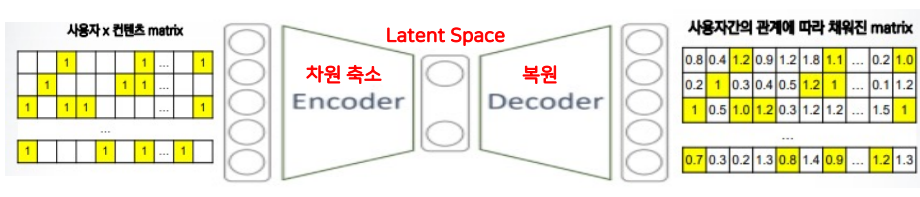

사용자가 매긴 평점을 바탕으로 AutoEncoder를 학습 시키고, 보지 않은(평점이 0인) 값을 생성해 낸다.
생성해 낸 평점 중 높은 평점의 영화를 추천한다.

입력 : 사용자 index

출력 : 추천 영화들

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

In [ ]:
rating = pd.read_csv("movie_ratings_small.csv")
rating.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
meta = pd.read_csv('movies_metadata.csv')
meta.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
# meta.id가 이상한 row들이 있다. 삭제하자. imdb=='0'으로 찾아낼 수 있다.
print(len(meta))
display(meta[meta.imdb_id=='0'])
meta = meta[meta.imdb_id!='0']
print(len(meta))

45466


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Midnight Man,False,6.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Mardock Scramble: The Third Exhaust,False,7.0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Beware Of Frost Bites,Avalanche Sharks,False,4.3,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


45463


2개의 dataframe을 합치기

In [ ]:
meta = meta.rename(columns={'id':'movieId'})
meta['movieId'] = meta['movieId'].astype(int)

merged = pd.merge(rating, meta[['movieId', 'original_title']], how='left', on='movieId')
merged

,userId,movieId,rating,timestamp,original_title
0,1,31,2.5,1260759144,NaN
1,1,1029,3.0,1260759179,NaN
2,1,1061,3.0,1260759182,NaN
3,1,1129,2.0,1260759185,NaN
4,1,1172,4.0,1260759205,NaN
...,...,...,...,...,...
100004,671,6268,2.5,1065579370,NaN
100005,671,6269,4.0,1065149201,NaN
100006,671,6365,4.0,1070940363,NaN
100007,671,6385,2.5,1070979663,NaN


original_title이 비어있는 row 삭제

In [ ]:
print(len(merged))
merged = merged[merged['original_title'].notnull()].reset_index(drop=True)
print(len(merged))
merged.head()

100009
44994


,userId,movieId,rating,timestamp,original_title
0,1,1371,2.5,1260759135,Rocky III
1,1,1405,1.0,1260759203,Greed
2,1,2105,4.0,1260759139,American Pie
3,1,2193,2.0,1260759198,My Tutor
4,1,2294,2.0,1260759108,Jay and Silent Bob Strike Back


In [ ]:
id2title = {}
title2id = {}

for index, row in merged.iterrows():
    id2title[row['movieId']] = row['original_title']
    title2id[row['original_title']] = row['movieId']

In [ ]:
user_movie_matrix = merged.pivot_table(index='userId', columns = 'movieId', values = 'rating')

In [ ]:
user_movie_matrix

movieId,2,3,5,6,11,12,13,14,15,16,17,18,19,20,21,22,24,25,26,27,28,30,35,38,55,58,59,62,63,64,65,66,68,69,70,71,73,74,76,77,...,111759,111913,112460,112582,112655,112735,112767,114044,114060,114464,115210,115877,116977,118900,120637,121113,121491,122924,126420,127098,127728,128606,128846,129009,130450,130452,130980,131830,132961,133365,134158,134368,134569,134881,135536,140174,142507,148652,158238,160718
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,NaN,NaN,NaN,4.0,3.0,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,3.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
user_movie_matrix.fillna(0, inplace=True)

In [ ]:
user_movie_matrix

movieId,2,3,5,6,11,12,13,14,15,16,17,18,19,20,21,22,24,25,26,27,28,30,35,38,55,58,59,62,63,64,65,66,68,69,70,71,73,74,76,77,...,111759,111913,112460,112582,112655,112735,112767,114044,114060,114464,115210,115877,116977,118900,120637,121113,121491,122924,126420,127098,127728,128606,128846,129009,130450,130452,130980,131830,132961,133365,134158,134368,134569,134881,135536,140174,142507,148652,158238,160718
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
user_movie_matrix = merged.pivot_table(index='userId', columns = 'movieId', values = 'rating').fillna(0)
user_movie_matrix

movieId,2,3,5,6,11,12,13,14,15,16,17,18,19,20,21,22,24,25,26,27,28,30,35,38,55,58,59,62,63,64,65,66,68,69,70,71,73,74,76,77,...,111759,111913,112460,112582,112655,112735,112767,114044,114060,114464,115210,115877,116977,118900,120637,121113,121491,122924,126420,127098,127728,128606,128846,129009,130450,130452,130980,131830,132961,133365,134158,134368,134569,134881,135536,140174,142507,148652,158238,160718
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x = user_movie_matrix.values

In [ ]:
x.shape

(671, 2830)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential

In [ ]:
# 모형 구성
model = Sequential()
model.add(Input((2830,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(2830))
model.compile(optimizer='adam', loss='mse')


# 모형 학습
hist = model.fit(x, x, epochs=100, batch_size=256, validation_split=0.1)


Epoch 1/100
3/3 [==============================] - 2s 149ms/step - loss: 0.3300 - val_loss: 0.2745
Epoch 2/100
3/3 [==============================] - 0s 13ms/step - loss: 0.3022 - val_loss: 0.2479
Epoch 3/100
3/3 [==============================] - 0s 13ms/step - loss: 0.2736 - val_loss: 0.2402
Epoch 4/100
3/3 [==============================] - 0s 14ms/step - loss: 0.2683 - val_loss: 0.2382
Epoch 5/100
3/3 [==============================] - 0s 12ms/step - loss: 0.2632 - val_loss: 0.2357
Epoch 6/100
3/3 [==============================] - 0s 13ms/step - loss: 0.2601 - val_loss: 0.2335
Epoch 7/100
3/3 [==============================] - 0s 13ms/step - loss: 0.2579 - val_loss: 0.2308
Epoch 8/100
3/3 [==============================] - 0s 12ms/step - loss: 0.2544 - val_loss: 0.2282
Epoch 9/100
3/3 [==============================] - 0s 14ms/step - loss: 0.2501 - val_loss: 0.2259
Epoch 10/100
3/3 [==============================] - 0s 13ms/step - loss: 0.2460 - val_loss: 0.2240
Epoch 11/100
3/3 [

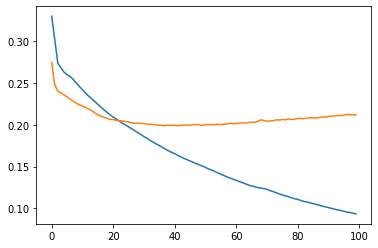

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

In [ ]:
reconstructed = model.predict(x)


In [ ]:
reconstructed

array([[ 3.10100280e-02,  1.73900388e-02,  1.48976175e-02, ...,
        -3.19662690e-03, -2.82896031e-03,  1.40442578e-02],
       [ 1.74324214e+00, -5.15954912e-01, -1.42874807e-01, ...,
         4.33538705e-02,  5.24954647e-02, -6.04269318e-02],
       [-5.32937683e-02, -4.40763757e-02, -1.32880822e-01, ...,
         3.07083149e-02, -1.29641742e-02, -2.08549462e-02],
       ...,
       [-8.83784145e-04,  5.84945455e-02,  1.73200481e-02, ...,
         1.67950371e-03, -9.76271927e-04, -1.04782758e-02],
       [-1.39256716e-01,  2.73044929e-02,  8.06689709e-02, ...,
        -7.91866612e-03,  1.87658146e-02,  1.17963189e-02],
       [ 3.74046564e-01,  1.39336511e-02,  3.79974812e-01, ...,
         4.25413251e-02,  1.33862048e-01,  4.96455766e-02]], dtype=float32)

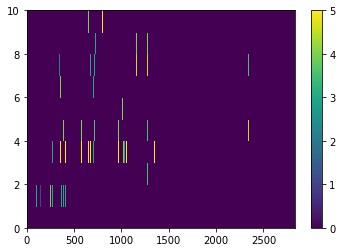

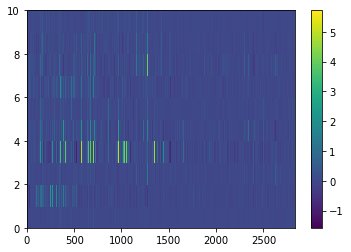

In [ ]:
plt.pcolor(x[:10])
plt.colorbar()
plt.show()
plt.pcolor(reconstructed[:10])
plt.colorbar()
plt.show()

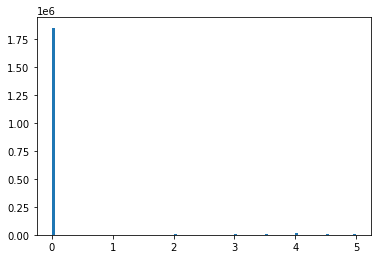

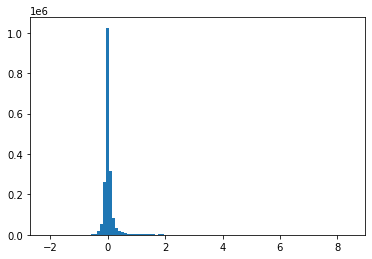

In [ ]:
plt.hist(x.flatten(), bins=100)
plt.show()
plt.hist(reconstructed.flatten(), bins=100)
plt.show()

In [ ]:
target_user_id = 1

user_record = user_movie_matrix.iloc[user_movie_matrix.index==target_user_id,:].values
print(user_record.shape)
print(user_record)

(1, 2830)
[[0. 0. 0. ... 0. 0. 0.]]


In [ ]:
reconstructed = model.predict(user_record)[0]
print(reconstructed.shape)
print(reconstructed)


(2830,)
[ 0.03101004  0.01739002  0.01489761 ... -0.00319662 -0.00282898
  0.01404426]


In [ ]:
user_viewed_movie_indexes = np.where(user_record[0]>0)[0]
print(len(user_viewed_movie_indexes))
print(user_viewed_movie_indexes)

reconstructed_movie_indexes = user_movie_matrix.columns[np.argsort(reconstructed.squeeze())[::-1]]
print(reconstructed_movie_indexes)

6
[ 704  725 1073 1123 1160 1203]
Int64Index([1376, 1374,  260, 2105,  541, 1127, 1580, 2011, 2528, 1375,
            ...
             180, 1252,  377, 4034, 1266, 4886,  492, 1485,  587,  292],
           dtype='int64', name='movieId', length=2830)


In [ ]:
recommed_movie_indexes = []
for i in reconstructed_movie_indexes:
    if i in user_viewed_movie_indexes : continue
    recommed_movie_indexes.append(i)

recommended_movies = [id2title[i] for i in recommed_movie_indexes]

print("recommended movies")
print(*recommended_movies[:10], sep="\n")

recommended movies
Sweet Sixteen
Rocky IV
The 39 Steps
American Pie
The Man with the Golden Arm
Princesas
Rope
Persepolis
Madame Bovary
Rocky V


## Softmax DNN

유저 id와 영황 id를 입력으로, 해당 rating을 출력으로 DNN을 학습. 이후 유저 id와 다른 영화 id를 입력으로 하여 rating을 예측하여 추천.

입력 : user id

출력 : 추천 영화들

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

In [ ]:
rating = pd.read_csv("movie_ratings_small.csv")
rating.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
meta = pd.read_csv('movies_metadata.csv')
meta.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
# meta.id가 이상한 row들이 있다. 삭제하자. imdb=='0'으로 찾아낼 수 있다.
print(len(meta))
display(meta[meta.imdb_id=='0'])
meta = meta[meta.imdb_id!='0']
print(len(meta))

45466


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Midnight Man,False,6.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Mardock Scramble: The Third Exhaust,False,7.0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Beware Of Frost Bites,Avalanche Sharks,False,4.3,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


45463


2개의 dataframe을 합치기

In [ ]:
meta = meta.rename(columns={'id':'movieId'})
meta['movieId'] = meta['movieId'].astype(int)

merged = pd.merge(rating, meta[['movieId', 'original_title']], how='left', on='movieId')
merged

,userId,movieId,rating,timestamp,original_title
0,1,31,2.5,1260759144,NaN
1,1,1029,3.0,1260759179,NaN
2,1,1061,3.0,1260759182,NaN
3,1,1129,2.0,1260759185,NaN
4,1,1172,4.0,1260759205,NaN
...,...,...,...,...,...
100004,671,6268,2.5,1065579370,NaN
100005,671,6269,4.0,1065149201,NaN
100006,671,6365,4.0,1070940363,NaN
100007,671,6385,2.5,1070979663,NaN


original_title이 비어있는 row 삭제

In [ ]:
print(len(merged))
merged = merged[merged['original_title'].notnull()].reset_index(drop=True)
print(len(merged))
merged.head()

100009
44994


,userId,movieId,rating,timestamp,original_title
0,1,1371,2.5,1260759135,Rocky III
1,1,1405,1.0,1260759203,Greed
2,1,2105,4.0,1260759139,American Pie
3,1,2193,2.0,1260759198,My Tutor
4,1,2294,2.0,1260759108,Jay and Silent Bob Strike Back


In [ ]:
id2title = {}
title2id = {}

for index, row in merged.iterrows():
    id2title[row['movieId']] = row['original_title']
    title2id[row['original_title']] = row['movieId']

In [ ]:
user_movie_matrix = merged.pivot_table(index='userId', columns = 'movieId', values = 'rating')

In [ ]:
user_movie_matrix

movieId,2,3,5,6,11,12,13,14,15,16,17,18,19,20,21,22,24,25,26,27,28,30,35,38,55,58,59,62,63,64,65,66,68,69,70,71,73,74,76,77,...,111759,111913,112460,112582,112655,112735,112767,114044,114060,114464,115210,115877,116977,118900,120637,121113,121491,122924,126420,127098,127728,128606,128846,129009,130450,130452,130980,131830,132961,133365,134158,134368,134569,134881,135536,140174,142507,148652,158238,160718
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,NaN,NaN,NaN,4.0,3.0,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,3.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
user_movie_matrix.fillna(0, inplace=True)

In [ ]:
user_movie_matrix

movieId,2,3,5,6,11,12,13,14,15,16,17,18,19,20,21,22,24,25,26,27,28,30,35,38,55,58,59,62,63,64,65,66,68,69,70,71,73,74,76,77,...,111759,111913,112460,112582,112655,112735,112767,114044,114060,114464,115210,115877,116977,118900,120637,121113,121491,122924,126420,127098,127728,128606,128846,129009,130450,130452,130980,131830,132961,133365,134158,134368,134569,134881,135536,140174,142507,148652,158238,160718
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
features = np.transpose(user_movie_matrix.values.nonzero()).tolist()
features = np.array(features)
print(features.shape)
print(features[:10])

(44989, 2)
[[   0  704]
 [   0  725]
 [   0 1073]
 [   0 1123]
 [   0 1160]
 [   0 1203]
 [   1   10]
 [   1   27]
 [   1   66]
 [   1   84]]


In [ ]:
labels = []
for i, j in features:
    labels.append(int(user_movie_matrix.values[i,j]))
labels = np.array(labels)
print(labels.shape)
print(labels[:10])

(44989,)
[2 1 4 2 2 2 5 3 4 3]


In [ ]:
user_count, movie_count = user_movie_matrix.shape
print(user_count)
print(movie_count)

671
2830


In [ ]:
from tensorflow.keras.utils import to_categorical

def one_hot_encoding(n_class, values):
    return np.eye(n_class)[values]
f1 = one_hot_encoding(user_count, features[:,0])
f2 = one_hot_encoding(movie_count, features[:,1])
print(f1.shape)
print(f2.shape)
x = np.concatenate([f1, f2], axis=1)
print(x.shape)
y = labels

(44989, 671)
(44989, 2830)
(44989, 3501)


In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, shuffle=True)

In [ ]:
print(train_x.shape)
print(test_x.shape)

(40490, 3501)
(4499, 3501)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, BatchNormalization
from tensorflow.keras import Sequential

# 모형 구성
model = Sequential()
model.add(Input((x.shape[-1],)))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1))

optimizer = tensorflow.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# 모형 학습
hist = model.fit(train_x, train_y, epochs=200, batch_size=128, validation_split=0.1)


Epoch 1/200
285/285 [==============================] - 2s 5ms/step - loss: 6.0453 - mae: 2.0706 - val_loss: 1.2294 - val_mae: 0.8746
Epoch 2/200
285/285 [==============================] - 1s 4ms/step - loss: 0.6989 - mae: 0.6505 - val_loss: 0.9234 - val_mae: 0.7600
Epoch 3/200
285/285 [==============================] - 1s 4ms/step - loss: 0.4413 - mae: 0.5163 - val_loss: 0.9789 - val_mae: 0.7683
Epoch 4/200
285/285 [==============================] - 1s 4ms/step - loss: 0.3256 - mae: 0.4436 - val_loss: 1.0235 - val_mae: 0.7878
Epoch 5/200
285/285 [==============================] - 1s 4ms/step - loss: 0.2672 - mae: 0.4031 - val_loss: 1.0130 - val_mae: 0.7848
Epoch 6/200
285/285 [==============================] - 1s 4ms/step - loss: 0.2259 - mae: 0.3706 - val_loss: 1.0460 - val_mae: 0.7979
Epoch 7/200
285/285 [==============================] - 1s 4ms/step - loss: 0.1936 - mae: 0.3445 - val_loss: 1.0215 - val_mae: 0.7812
Epoch 8/200
285/285 [==============================] - 1s 4ms/step - 

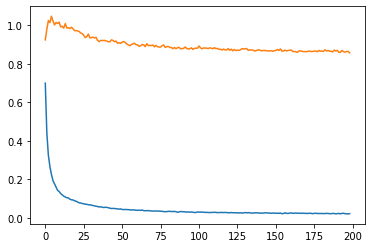

In [ ]:
plt.plot(hist.history['loss'][1:])
plt.plot(hist.history['val_loss'][1:])
plt.show()

In [ ]:
loss, mae = model.evaluate(test_x, test_y)
print("loss =",loss)
print("mae =",mae)

141/141 [==============================] - 0s 2ms/step - loss: 0.9097 - mae: 0.7405
loss = 0.9097365140914917
mae = 0.7405422925949097


0


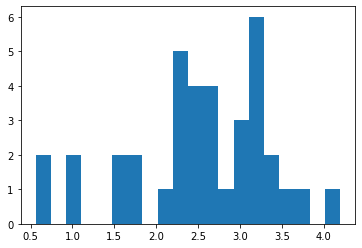

1


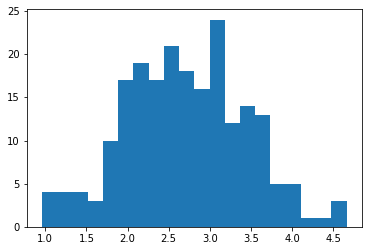

2


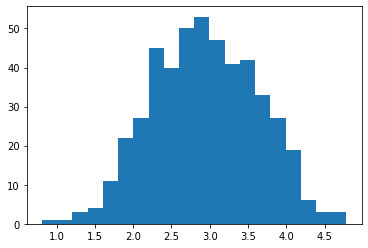

3


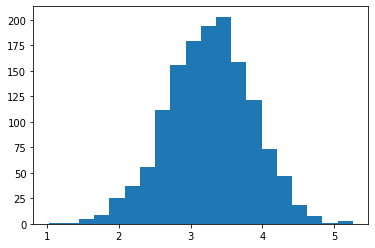

4


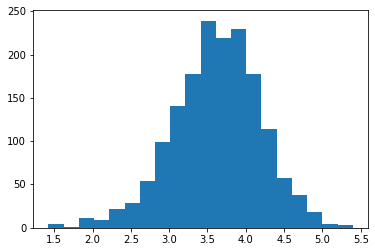

5


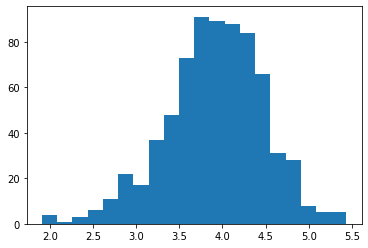

In [ ]:
y_ = model.predict(test_x)

for rating in range(6):
    print(rating)
    plt.hist(y_[np.where(test_y==rating)], bins=20)
    plt.show()

In [ ]:
user_id = 1
f1 = one_hot_encoding(user_count, [user_id]*movie_count)
f2 = one_hot_encoding(movie_count, np.arange(movie_count))

print(f1.shape)
print(f2.shape)

test_features = np.concatenate([f1, f2], axis=1)
print(test_features.shape)

(2830, 671)
(2830, 2830)
(2830, 3501)


In [ ]:
predicted = model.predict(test_features).squeeze()
print(predicted.shape)
print(predicted)

(2830,)
[3.6060977 3.0477376 2.8586874 ... 3.1365683 3.7400048 3.694609 ]


In [ ]:
user_viewed_movie_indexes = np.where(user_movie_matrix.values[user_id]>0)[0]
print(len(user_viewed_movie_indexes))
print(user_viewed_movie_indexes)

58
[ 10  27  66  84  90  92 100 104 107 122 123 148 149 151 159 172 177 185
 187 188 193 194 209 212 214 224 227 229 245 254 255 257 258 272 276 303
 305 313 321 332 334 341 342 352 358 359 369 370 371 391 392 393 394 395
 396 397 413 436]


In [ ]:
predicted_movie_indexes = user_movie_matrix.columns[np.argsort(predicted.squeeze())[::-1]]
print(predicted_movie_indexes)

Int64Index([ 265,  222,  590,  266,  551,  150, 2324, 3030,   17,  585,
            ...
             784, 5481, 8985, 3593,  546,  158, 1556,  160,  319,  223],
           dtype='int64', name='movieId', length=2830)


In [ ]:
recommed_movie_indexes = []
for i in predicted_movie_indexes:
    if i in user_viewed_movie_indexes : continue
    recommed_movie_indexes.append(i)

recommended_movies = [id2title[i] for i in recommed_movie_indexes]

print("recommended movies")
print(*recommended_movies[:10], sep="\n")

recommended movies
Lili Marleen
Berlin: Die Sinfonie der Grosstadt
The Hours
Le Mépris
The Poseidon Adventure
48 Hrs.
Local Color
End of the World
The Dark
Monsters, Inc.


## GMF



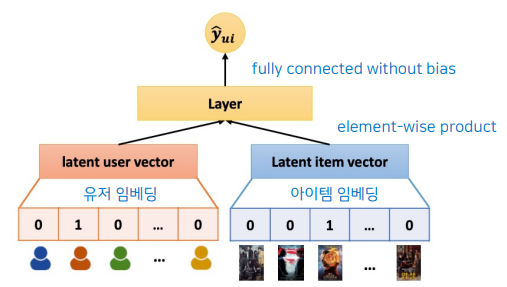

user one-hot vector와 item one-hot vector는 R에 존재하는 데이터만 활용

input = R에서 존재하는 데이터만 활용 (왜? R에서 존재하는 데이터만 활용하면 결국 user one-hot vector * Latent user vector, item one-hot vector * Latent item vector 을 한것과 동일하게 됨)

Latent user vector = (user_num ,factor)

Latent item vector = (item_num ,factor)

element_wise_product = Latent user vector * Latent item vector

out = FC_layer(element_wise_product, 1)

output = Y_ui ~ out

최종 예측 값은 유저가 해당 영화에 줄 평점이 될 것 따라서 이를 바탕으로 영화 추천이 가능

유저 id와 영황 id를 입력으로, 해당 rating을 출력으로 DNN을 학습. 이후 유저 id와 다른 영화 id를 입력으로 하여 rating을 예측하여 추천.

입력 : user id

출력 : 추천 영화들

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

In [ ]:
rating = pd.read_csv("movie_ratings_small.csv")
rating.head()

In [ ]:
meta = pd.read_csv('movies_metadata.csv')
meta.head()

In [ ]:
# meta.id가 이상한 row들이 있다. 삭제하자. imdb=='0'으로 찾아낼 수 있다.
print(len(meta))
display(meta[meta.imdb_id=='0'])
meta = meta[meta.imdb_id!='0']
print(len(meta))

2개의 dataframe을 합치기

In [ ]:
meta = meta.rename(columns={'id':'movieId'})
meta['movieId'] = meta['movieId'].astype(int)

merged = pd.merge(rating, meta[['movieId', 'original_title']], how='left', on='movieId')
merged

original_title이 비어있는 row 삭제

In [ ]:
print(len(merged))
merged = merged[merged['original_title'].notnull()].reset_index(drop=True)
print(len(merged))
merged.head()

In [ ]:
id2title = {}
title2id = {}

for index, row in merged.iterrows():
    id2title[row['movieId']] = row['original_title']
    title2id[row['original_title']] = row['movieId']

In [ ]:
user_movie_matrix = merged.pivot_table(index='userId', columns = 'movieId', values = 'rating')

In [ ]:
user_movie_matrix

In [ ]:
user_movie_matrix.fillna(0, inplace=True)

In [ ]:
user_movie_matrix

In [ ]:
features = np.transpose(user_movie_matrix.values.nonzero()).tolist()
print(features[:10])
import random
random.shuffle(features)
print(features[:10])

In [ ]:
user_inputs = []
movie_inputs = []
labels = []
for u, m in features:

    # positive sampling
    user_inputs.append(u)
    movie_inputs.append(m)
    labels.append(int(True))

    # negative sampling
    j = np.random.randint(movie_count)
    while [u,j] in features:
        j = np.random.randint(movie_count)
    user_inputs.append(u)
    movie_inputs.append(j)
    labels.append(int(False))

user_inputs = np.array(user_inputs)
movie_inputs = np.array(movie_inputs)
labels = np.array(labels)
print(user_inputs.shape)
print(movie_inputs.shape)
print(labels.shape)
print(labels[:10])

In [ ]:
user_count, movie_count = user_movie_matrix.shape
print(user_count)
print(movie_count)

In [ ]:
x = ( user_inputs, movie_inputs )
y = labels

copy from https://dnddnjs.github.io/recomm/2019/08/15/neural_collaborative_filtering/

In [ ]:
def get_model(num_users, num_items, mf_dim=10, layers=[10], reg_layers=[0], reg_mf=0):
    assert len(layers) == len(reg_layers)
    num_layer = len(layers) #Number of layers in the MLP
    # Input variables
    user_input = Input(shape=(1,), dtype='int32', name = 'user_input')
    item_input = Input(shape=(1,), dtype='int32', name = 'item_input')
    
    init_normal = tensorflow.keras.initializers.RandomNormal()
    from tensorflow.keras.regularizers import l2

    # Embedding layer
    MF_Embedding_User = Embedding(input_dim = num_users, output_dim = mf_dim, name = 'mf_embedding_user',
                                    embeddings_initializer = init_normal, embeddings_regularizer = l2(reg_mf), input_length=1)
    MF_Embedding_Item = Embedding(input_dim = num_items, output_dim = mf_dim, name = 'mf_embedding_item',
                                    embeddings_initializer = init_normal, embeddings_regularizer = l2(reg_mf), input_length=1)   

    MLP_Embedding_User = Embedding(input_dim = num_users, output_dim = layers[0]/2, name = "mlp_embedding_user",
                                    embeddings_initializer = init_normal, embeddings_regularizer = l2(reg_layers[0]), input_length=1)
    MLP_Embedding_Item = Embedding(input_dim = num_items, output_dim = layers[0]/2, name = 'mlp_embedding_item',
                                    embeddings_initializer = init_normal, embeddings_regularizer = l2(reg_layers[0]), input_length=1)   
    
    # MF part
    mf_user_latent = Flatten()(MF_Embedding_User(user_input))
    mf_item_latent = Flatten()(MF_Embedding_Item(item_input))
    mf_vector = Concatenate([mf_user_latent, mf_item_latent]) # element-wise multiply

    # MLP part 
    mlp_user_latent = Flatten()(MLP_Embedding_User(user_input))
    mlp_item_latent = Flatten()(MLP_Embedding_Item(item_input))
    mlp_vector = Concatenate([mlp_user_latent, mlp_item_latent])
    for idx in xrange(1, num_layer):
        layer = Dense(layers[idx], W_regularizer= l2(reg_layers[idx]), activation='relu', name="layer%d" %idx)
        mlp_vector = layer(mlp_vector)

    # Concatenate MF and MLP parts
    #mf_vector = Lambda(lambda x: x * alpha)(mf_vector)
    #mlp_vector = Lambda(lambda x : x * (1-alpha))(mlp_vector)
    predict_vector = Concatenate([mf_vector, mlp_vector])
    
    # Final prediction layer
    prediction = Dense(1, activation='sigmoid', init='lecun_uniform', name = "prediction")(predict_vector)
    
    model = Model(input=[user_input, item_input], 
                    output=prediction)
    
    return model

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Embedding, Flatten, Concatenate
from tensorflow.keras import Sequential

# 모형 구성
model = get_model(user_count, movie_count)

# optimizer = tensorflow.keras.optimizers.Adam(lr=0.001)
# model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['mae'])

# 모형 학습
# hist = model.fit(x, y, epochs=200, batch_size=128, validation_split=0.1)


In [ ]:
dataset = NCFData(features_idx)
loader = data.DataLoader(dataset, batch_size = BATCH_SIZE)
pred = predict(model, loader)
pred = torch.cat(pred).view(user_num, item_num)

In [ ]:
pred.shape

In [ ]:
pred

In [ ]:
R.shape

In [ ]:
R

In [ ]:
_, idx =  torch.topk(pred, k = 10, dim = 1)

In [ ]:
pred[0, 168]

In [ ]:
R[0, 168]

데이터의 양이 적고 매우 Sparse한 형태의 데이터이기 때문에 모델의 성능이 매우 좋지 않은 것으로 생각된다.

## MLP-based MF

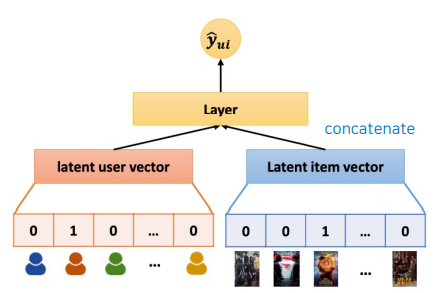

user one-hot vector와 item one-hot vector는 R에 존재하는 데이터만 활용

input = R에서 존재하는 데이터만 활용 (왜? R에서 존재하는 데이터만 활용하면 결국 user one-hot vector * Latent user vector, item one-hot vector * Latent item vector 을 한것과 동일하게 됨)

Latent user vector = (user_num ,factor)

Latent item vector = (item_num ,factor)

concat_two_latent_vactors = concat(Latent user vector, Latent item vector)

output_MLP = MLP_layer(concat_two_latent_vactors)

out = FC_layer(output_MLP, 1)

output = Y_ui ~ out

최종 예측 값은 유저가 해당 영화에 줄 평점이 될 것 따라서 이를 바탕으로 영화 추천이 가능

In [ ]:
import os
import time
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.backends.cudnn as cudnn

import pandas as pd
import scipy.sparse as sp
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

In [ ]:
movie_paths = '/content/drive/MyDrive/추천/data/movies/'

movie = pd.read_csv(movie_paths + "ratings.csv")
meta = pd.read_csv(movie_paths + 'movies_metadata.csv', low_memory=False)
meta = meta.rename(columns={'id':'movieId'})

In [ ]:
movie.head()

In [ ]:
meta.head()

In [ ]:
# meta.id가 이상한 row들이 있다. 삭제하자. imdb=='0'으로 찾아낼 수 있다.
print(len(meta))
display(meta[meta.imdb_id=='0'])
meta = meta[meta.imdb_id!='0']
print(len(meta))

In [ ]:
meta = meta.rename(columns={'id':'movieId'})
meta['movieId'] = meta['movieId'].astype(int)

merged = pd.merge(rating, meta[['movieId', 'original_title']], how='left', on='movieId')
merged

In [ ]:
df = movie.pivot_table(index='userId', columns = 'movieId', values = 'rating').fillna(0)
df.head()

In [ ]:
# 환경설정
if torch.cuda.is_available():
  DEVICE = torch.device('cuda')
else:
  DEVICE = torch.device('cpu')
print(DEVICE)

In [ ]:
BATCH_SIZE = 128
EPOCHS = 10

In [ ]:
R = df.iloc[:, : ].values

user_num = R.shape[0]
item_num = R.shape[1]

In [ ]:
features_idx = []
for i in range(user_num):
  for j in range(item_num):
    features_idx.append([i, j])

In [ ]:
features = np.transpose(R.nonzero()).tolist()

In [ ]:
labels = []

for i, j in features:
  labels.append(R[i, j])

In [ ]:
class MLP_MF(nn.Module):
  def __init__(self, user_num, item_num, factor_num, num_layers = 3):
      super(MLP_MF, self).__init__()

      # 유저 임베딩
      self.user_embedding = nn.Embedding(user_num, factor_num)

      # 아이템 임베딩
      self.item_embedding = nn.Embedding(item_num, factor_num)

      MLP_modules = []
      input_size = factor_num * 2
      for i in range(num_layers):
        MLP_modules.append(nn.Linear(input_size, input_size // 2))
        MLP_modules.append(nn.ReLU())
        input_size //=  2
      self.MLP_layers = nn.Sequential(*MLP_modules)

      # FC
      self.FC_layer = nn.Sequential(
          nn.Linear(input_size, 1)
      )
      self._init_weight_()

  def _init_weight_(self):
      # weight 초기화
      nn.init.xavier_uniform_(self.user_embedding.weight)
      nn.init.xavier_uniform_(self.item_embedding.weight)
      for m in self.MLP_layers:
          if isinstance(m, nn.Linear):
              nn.init.xavier_uniform_(m.weight)

      for m in self.FC_layer:
          if isinstance(m, nn.Linear):
              nn.init.xavier_uniform_(m.weight)

  def forward(self, user, item):
      user_embedding = self.user_embedding(user)
      item_embedding = self.item_embedding(item)

      concat_two_latent_vactors = torch.cat((user_embedding, item_embedding), -1)
      output_MLP = self.MLP_layers(concat_two_latent_vactors)

      out = self.FC_layer(output_MLP)
      out = out.view(-1)

      return out

In [ ]:
model = MLP_MF(user_num = user_num, item_num = item_num, factor_num = 20).to(DEVICE)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
class NCFData(data.Dataset):
    def __init__(self, features, labels = None):
        super(NCFData, self).__init__()
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):

      if self.labels is not None:
        user = self.features[idx][0]
        item = self.features[idx][1]
        label = self.labels[idx]

        return user, item, label

      else: 
        user = self.features[idx][0]
        item = self.features[idx][1]
        return user, item

In [ ]:
def train(model, train_loader):
  model.train()
  train_loss = 0
  for user, item, label in train_loader:
    user = user.to(DEVICE)
    item = item.to(DEVICE)
    label = label.float().to(DEVICE)
    optimizer.zero_grad()
    output = model(user, item)
    loss = criterion(output, label)
    loss.backward()
    optimizer.step()

    train_loss += loss.item()

  train_loss /= len(train_loader)
  return train_loss

In [ ]:
def predict(model, loader):
  model.eval()
  result = []
  with torch.no_grad():
    for user, item in loader:
      user = user.to(DEVICE)
      item = item.to(DEVICE)
      output = model(user, item)
      result.append(output.view(-1))

  return result

In [ ]:
train_dataset = NCFData(features, labels)
train_loader = data.DataLoader(train_dataset, batch_size=BATCH_SIZE)

for epoch in range(1, EPOCHS + 1):
  train_loss = train(model, train_loader)
  print(f"\n[EPOCH: {epoch}], \tTrain Loss: {train_loss:.4f}")

In [ ]:
dataset = NCFData(features_idx)
loader = data.DataLoader(dataset, batch_size = BATCH_SIZE)
pred = predict(model, loader)
pred = torch.cat(pred).view(user_num, item_num)

In [ ]:
pred.shape

In [ ]:
pred

In [ ]:
R.shape

In [ ]:
R

In [ ]:
_, idx =  torch.topk(pred, k = 10, dim = 1)

In [ ]:
pred[0, 168]

In [ ]:
R[0, 168]

데이터의 양이 적고 매우 Sparse한 형태의 데이터이기 때문에 모델의 성능이 매우 좋지 않은 것으로 생각된다.

## NCF

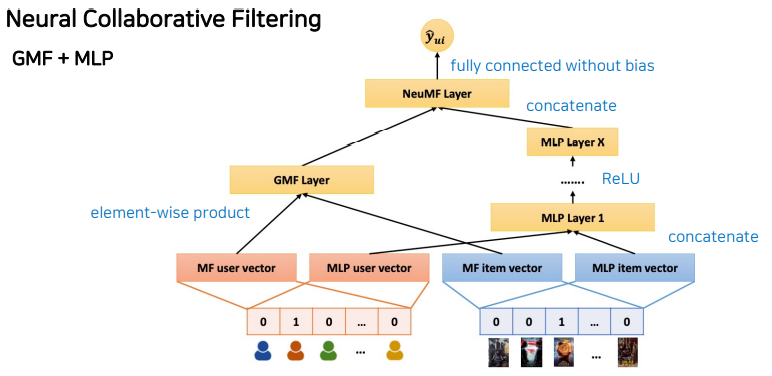

user one-hot vector와 item one-hot vector는 R에 존재하는 데이터만 활용

input = R에서 존재하는 데이터만 활용 (왜? R에서 존재하는 데이터만 활용하면 결국 user one-hot vector * Latent user vector, item one-hot vector * Latent item vector 을 한것과 동일하게 됨)

GMF Latent user vector = (user_num ,factor)

GMF Latent item vector = (item_num ,factor)

MLP Latent user vector = (user_num ,factor)

MLP Latent item vector = (item_num ,factor)

output_GMF = GMF Latent user vector * GMF Latent item vector

MLP_concat_two_latent_vactors = concat(MLP Latent user vector, MLP Latent item vector)

output_MLP = MLP_layer(MLP_concat_two_latent_vactors)

output = concat(output_GMF, output_MLP)

out = FC_layer(output, 1)

output = Y_ui ~ out

최종 예측 값은 유저가 해당 영화에 줄 평점이 될 것 따라서 이를 바탕으로 영화 추천이 가능

In [ ]:
import os
import time
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.backends.cudnn as cudnn

import pandas as pd
import scipy.sparse as sp
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

In [ ]:
movie_paths = '/content/drive/MyDrive/추천/data/movies/'

movie = pd.read_csv(movie_paths + "ratings.csv")
meta = pd.read_csv(movie_paths + 'movies_metadata.csv', low_memory=False)
meta = meta.rename(columns={'id':'movieId'})

In [ ]:
movie.head()

In [ ]:
meta.head()

In [ ]:
meta = meta.rename(columns={'id':'movieId'})
meta['movieId'] = meta['movieId'].astype(int)

merged = pd.merge(rating, meta[['movieId', 'original_title']], how='left', on='movieId')
merged

In [ ]:
df = movie.pivot_table(index='userId', columns = 'movieId', values = 'rating').fillna(0)
df.head()

In [ ]:
# 환경설정
if torch.cuda.is_available():
  DEVICE = torch.device('cuda')
else:
  DEVICE = torch.device('cpu')
print(DEVICE)

In [ ]:
BATCH_SIZE = 128
EPOCHS = 10

In [ ]:
R = df.iloc[:, : ].values

user_num = R.shape[0]
item_num = R.shape[1]

In [ ]:
features_idx = []
for i in range(user_num):
  for j in range(item_num):
    features_idx.append([i, j])

In [ ]:
features = np.transpose(R.nonzero()).tolist()

In [ ]:
labels = []

for i, j in features:
  labels.append(R[i, j])

In [ ]:
class GMF_and_MLP(nn.Module):
  def __init__(self, user_num, item_num, factor_num, num_layers = 3):
      super(GMF_and_MLP, self).__init__()

      # GMF 임베딩
      self.GMF_user_embedding = nn.Embedding(user_num, factor_num)
      self.GMF_item_embedding = nn.Embedding(item_num, factor_num)

      # MLP 임베딩
      self.MLP_user_embedding = nn.Embedding(user_num, factor_num)
      self.MLP_item_embedding = nn.Embedding(item_num, factor_num)

      MLP_modules = []
      input_size = factor_num * 2
      for i in range(num_layers):
        MLP_modules.append(nn.Linear(input_size, input_size // 2))
        MLP_modules.append(nn.ReLU())
        input_size //=  2
      self.MLP_layers = nn.Sequential(*MLP_modules)

      # FC
      self.FC_layer = nn.Sequential(
          nn.Linear(factor_num + input_size, 1)
      )
      self._init_weight_()

  def _init_weight_(self):
      # weight 초기화
      nn.init.normal_(self.GMF_user_embedding.weight, std=0.01)
      nn.init.normal_(self.GMF_item_embedding.weight, std=0.01)
      nn.init.normal_(self.MLP_user_embedding.weight, std=0.01)
      nn.init.normal_(self.MLP_item_embedding.weight, std=0.01)

      for m in self.MLP_layers:
          if isinstance(m, nn.Linear):
              nn.init.xavier_uniform_(m.weight)

      for m in self.FC_layer:
          if isinstance(m, nn.Linear):
              nn.init.xavier_uniform_(m.weight)

  def forward(self, user, item):
      GMF_user_embedding = self.GMF_user_embedding(user)
      GMF_item_embedding = self.GMF_item_embedding(item)

      output_GMF = (GMF_user_embedding * GMF_item_embedding)

      MLP_user_embedding = self.MLP_user_embedding(user)
      MLP_item_embedding = self.MLP_item_embedding(item)

      concat_two_latent_vactors = torch.cat((MLP_user_embedding, MLP_item_embedding), -1)
      output_MLP = self.MLP_layers(concat_two_latent_vactors)

      concat_GMF_MLP = torch.cat((output_GMF, output_MLP), -1)

      out = self.FC_layer(concat_GMF_MLP)
      out = out.view(-1)

      return out

In [ ]:
model = GMF_and_MLP(user_num = user_num, item_num = item_num, factor_num = 20).to(DEVICE)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
class NCFData(data.Dataset):
    def __init__(self, features, labels = None):
        super(NCFData, self).__init__()
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):

      if self.labels is not None:
        user = self.features[idx][0]
        item = self.features[idx][1]
        label = self.labels[idx]

        return user, item, label

      else: 
        user = self.features[idx][0]
        item = self.features[idx][1]
        return user, item

In [ ]:
def train(model, train_loader):
  model.train()
  train_loss = 0
  for user, item, label in train_loader:
    user = user.to(DEVICE)
    item = item.to(DEVICE)
    label = label.float().to(DEVICE)
    optimizer.zero_grad()
    output = model(user, item)
    loss = criterion(output, label)
    loss.backward()
    optimizer.step()

    train_loss += loss.item()

  train_loss /= len(train_loader)
  return train_loss

In [ ]:
def predict(model, loader):
  model.eval()
  result = []
  with torch.no_grad():
    for user, item in loader:
      user = user.to(DEVICE)
      item = item.to(DEVICE)
      output = model(user, item)
      result.append(output.view(-1))

  return result

In [ ]:
train_dataset = NCFData(features, labels)
train_loader = data.DataLoader(train_dataset, batch_size=BATCH_SIZE)

for epoch in range(1, EPOCHS + 1):
  train_loss = train(model, train_loader)
  print(f"\n[EPOCH: {epoch}], \tTrain Loss: {train_loss:.4f}")

In [ ]:
dataset = NCFData(features_idx)
loader = data.DataLoader(dataset, batch_size = BATCH_SIZE)
pred = predict(model, loader)
pred = torch.cat(pred).view(user_num, item_num)

In [ ]:
pred.shape

In [ ]:
pred

In [ ]:
R.shape

In [ ]:
R

In [ ]:
_, idx =  torch.topk(pred, k = 10, dim = 1)

In [ ]:
pred[0, 168]

In [ ]:
R[0, 168]

데이터의 양이 적고 매우 Sparse한 형태의 데이터이기 때문에 모델의 성능이 매우 좋지 않은 것으로 생각된다.

# 참고자료

- https://developers.google.com/machine-learning/recommendation?hl=ko

- https://tacademy.skplanet.com/live/player/onlineLectureDetail.action?seq=194

- https://www.youtube.com/watch?v=1fhNX_JFaow

- https://brunch.co.kr/@kakao-it/72#comment

- https://www.youtube.com/watch?v=h6vePourB7E&list=LL&index=1&t=15s

- https://ratsgo.github.io/generative%20model/2018/01/27/VAE/

- https://github.com/GunhoChoi/PyTorch-FastCampus/blob/master/08_Autoencoder/3_Variational_Autoencoder.ipynb

- https://ko-kr.facebook.com/groups/TensorFlowKR/permalink/524873987853664/

- https://doheelab.github.io/recommender-system/ncf_mlp/